In [28]:
import numpy as np
import scipy.stats
import pandas as pd

In [29]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

In [30]:
import re
import csv

In [31]:
smoking = pd.read_csv('SmokingData.csv')


In [32]:
smoking.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [33]:
#Counts number of smokers and non-smokers
pd.DataFrame(smoking.smoker.value_counts())

,count
smoker,
No,732
Yes,582


In [34]:
#Counts number of alive and dead
pd.DataFrame(smoking.outcome.value_counts())

,count
outcome,
Alive,945
Dead,369


In [35]:
#value_counts: returns an object containing counts of unique values
#With normalize=True, returns the relative frequency by dividing all values by the sum of values
bysmoker = smoking.groupby("smoker").outcome.value_counts(normalize=True)

In [36]:
#the fractions obtained are proportions
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: proportion, dtype: float64

This shows that smokers have a higher life expectancy<br>
This is Simpson's Paradox.<br>
a phenomenon in probability and statistics in which a trend appears in several groups of data<br>
but disappears or reverses when the groups are combined.

In [37]:
#unstack(): a function that pivots the level of the indexed columns in a stacked dataframe
#provides better view of previous result
bysmoker.unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


In [38]:
#Segment and sort data into bins (continuous variable-->categorical variable)
smoking['ageGroup'] = pd.cut(smoking.age,[0,30,40,53,64],labels=['0-30','30-40','40-53','53-64'])

In [39]:
byage = smoking.groupby(['ageGroup','smoker']).outcome.value_counts(normalize=True)

C:\Users\Heba A\AppData\Local\Temp\ipykernel_14276\3658500534.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  byage = smoking.groupby(['ageGroup','smoker']).outcome.value_counts(normalize=True)


In [40]:
byage

ageGroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-53     No      Alive      0.876106
                  Dead       0.123894
          Yes     Alive      0.802395
                  Dead       0.197605
53-64     No      Alive      0.669291
                  Dead       0.330709
          Yes     Alive      0.580645
                  Dead       0.419355
Name: proportion, dtype: float64

In [41]:
byage.unstack().drop("Dead", axis=1)

outcome             Alive
ageGroup smoker          
0-30     No      0.981818
         Yes     0.975610
30-40    No      0.955224
         Yes     0.940678
40-53    No      0.876106
         Yes     0.802395
53-64    No      0.669291
         Yes     0.580645

It can be observed thatin each group, no smoker has a better life expectency<br>
This is a part of the Simpson's Paradox

# Data Visualization

In [42]:
byage

ageGroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-53     No      Alive      0.876106
                  Dead       0.123894
          Yes     Alive      0.802395
                  Dead       0.197605
53-64     No      Alive      0.669291
                  Dead       0.330709
          Yes     Alive      0.580645
                  Dead       0.419355
Name: proportion, dtype: float64

<Axes: xlabel='outcome'>

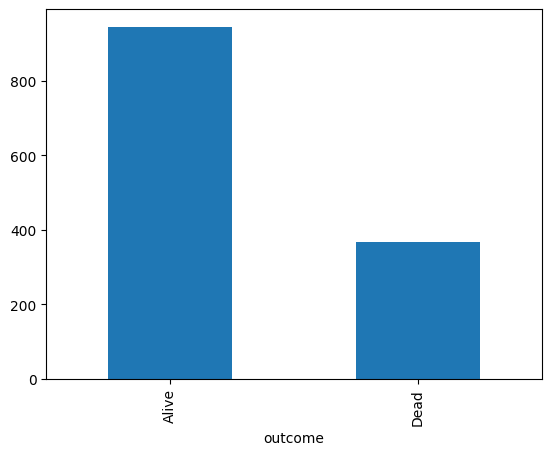

In [43]:
smoking.outcome.value_counts().plot(kind='bar')

Text(0.5, 1.0, 'smoker')

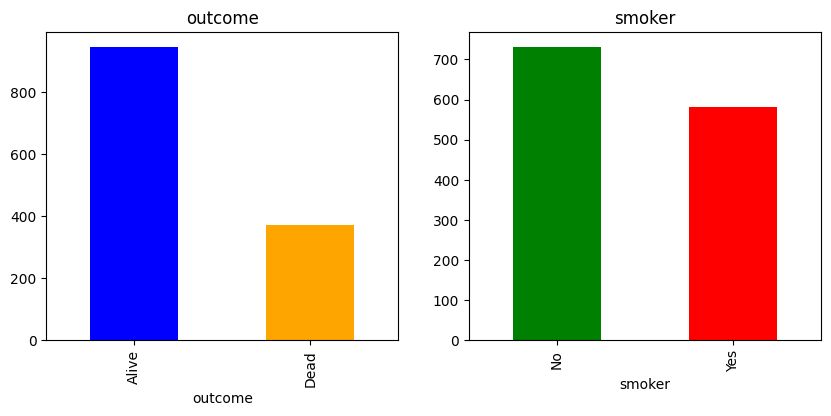

In [44]:
pp.figure(figsize=(10,4))

pp.subplot(1,2,1)
smoking.outcome.value_counts().plot(kind='bar', color=['blue', 'orange'])
pp.title('outcome')
pp.subplot(1,2,2)
smoking.smoker.value_counts().plot(kind='bar', color=['green', 'red'])
pp.title('smoker')

In [45]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: proportion, dtype: float64

<Axes: xlabel='smoker,outcome'>

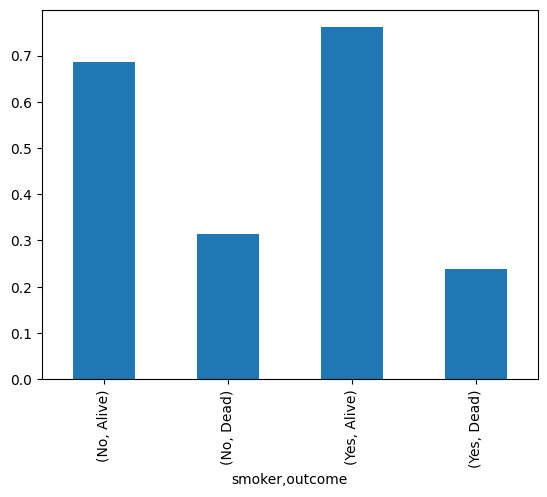

In [46]:
bysmoker.plot(kind='bar')

<Axes: xlabel='smoker'>

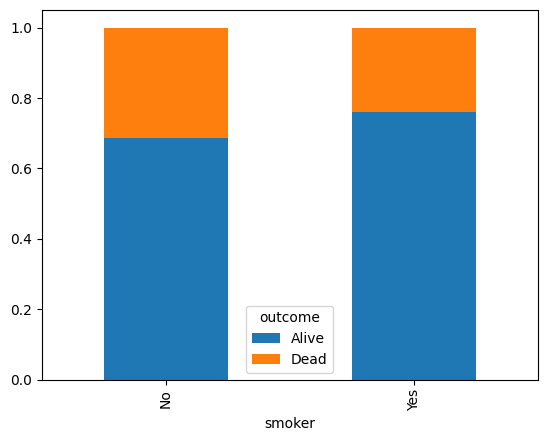

In [47]:
#TO better visualize the prev graph, unstack the bysmoker
#Here, again, the simpson paradox comes into picture where we are seeing that suspiciously
#smokers stay as alive as the non-smokers
bysmoker.unstack().plot(kind='bar',stacked=True)


<Axes: xlabel='ageGroup,smoker'>

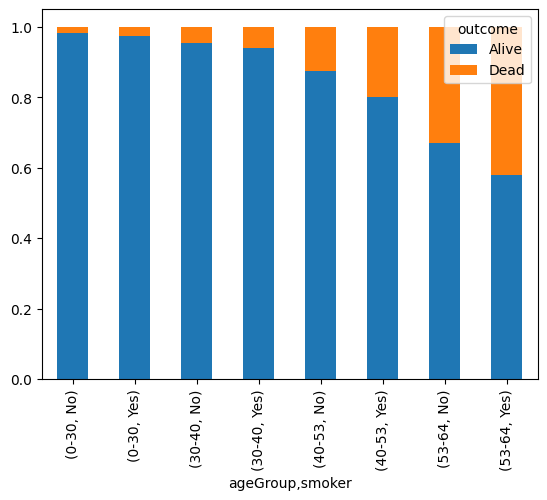

In [48]:
#So, we break it up by age group
byage.unstack().plot(kind='bar', stacked=True)
#This is alsbo not a very good outcome. TO find the problem, look at the underlying DF

In [49]:
byage.unstack()

outcome             Alive      Dead
ageGroup smoker                    
0-30     No      0.981818  0.018182
         Yes     0.975610  0.024390
30-40    No      0.955224  0.044776
         Yes     0.940678  0.059322
40-53    No      0.876106  0.123894
         Yes     0.802395  0.197605
53-64    No      0.669291  0.330709
         Yes     0.580645  0.419355

In [50]:
#axis=1 since it is a column
byage2 = byage.unstack().drop("Dead",axis=1).unstack()

#Give labels to new DF
byage2.columns = ["No", "Yes"]
byage2.columns.name = "smoker"

In [51]:
byage2

smoker,No,Yes
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-53,0.876106,0.802395
53-64,0.669291,0.580645


<Axes: xlabel='ageGroup'>

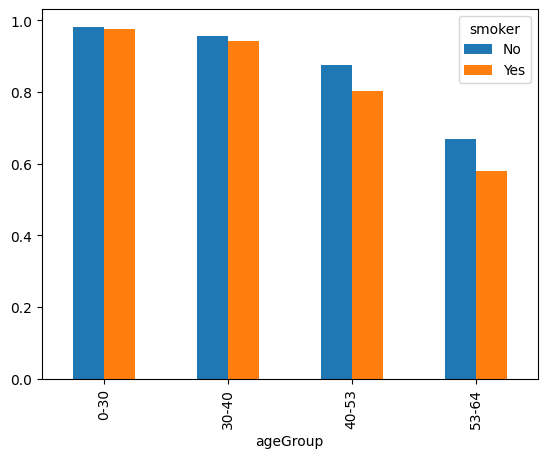

In [52]:
byage2.plot(kind='bar')

Now we can see that non-smokers in each age group have a slight edge in the outcome